# Problem Statement

I have written my own data retrieval python program that retrieves data from Land Transport Authority (LTA) DataMall Bus Arrival API (https://datamall.lta.gov.sg/). The program collects data from the API every minute for a specific bus route and appends the results into a CSV file.

Given this dataset, can we capture the seasonality and patterns that is present and predict the travel duration between two stops accurately using Machine Learning (ML) algorithms?

In [1]:
import pandas as pd

csv_file_path = '../data-retriever/test.csv'

col_names = ['BusStopCode', 'NextStop', 'CurrentTime', 'ServiceNo', 'Operator',
       'NextBus.OriginCode', 'NextBus.DestinationCode',
       'NextBus.EstimatedArrival', 'NextBus.Latitude', 'NextBus.Longitude',
       'NextBus.VisitNumber', 'NextBus.Load', 'NextBus.Feature',
       'NextBus.Type', 'NextBus2.OriginCode', 'NextBus2.DestinationCode',
       'NextBus2.EstimatedArrival', 'NextBus2.Latitude', 'NextBus2.Longitude',
       'NextBus2.VisitNumber', 'NextBus2.Load', 'NextBus2.Feature',
       'NextBus2.Type', 'NextBus3.OriginCode', 'NextBus3.DestinationCode',
       'NextBus3.EstimatedArrival', 'NextBus3.Latitude', 'NextBus3.Longitude',
       'NextBus3.VisitNumber', 'NextBus3.Load', 'NextBus3.Feature',
       'NextBus3.Type']

df = pd.read_csv(csv_file_path, index_col=False, names = col_names)


# Let's take a brief look at our dataset! 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185504 entries, 0 to 185503
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BusStopCode                185504 non-null  int64  
 1   NextStop                   177072 non-null  float64
 2   CurrentTime                185504 non-null  object 
 3   ServiceNo                  158097 non-null  float64
 4   Operator                   158097 non-null  object 
 5   NextBus.OriginCode         158097 non-null  float64
 6   NextBus.DestinationCode    158097 non-null  float64
 7   NextBus.EstimatedArrival   158097 non-null  object 
 8   NextBus.Latitude           158097 non-null  float64
 9   NextBus.Longitude          158097 non-null  float64
 10  NextBus.VisitNumber        158097 non-null  float64
 11  NextBus.Load               158097 non-null  object 
 12  NextBus.Feature            158097 non-null  object 
 13  NextBus.Type               15

# Handling NaN values in our dataset
Oh? We have some NaN values in our next_stop column, let's dig deep to find out why!

In [3]:
df.loc[df['NextStop'].isnull()]

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,NextBus2.Type,NextBus3.OriginCode,NextBus3.DestinationCode,NextBus3.EstimatedArrival,NextBus3.Latitude,NextBus3.Longitude,NextBus3.VisitNumber,NextBus3.Load,NextBus3.Feature,NextBus3.Type
21,46009,NaN,2022-06-26 09:09:02.887156,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,SD,46009.0,46009.0,2022-06-26T17:27:00+08:00,0.0,0.0,1.0,SEA,WAB,SD
43,46009,NaN,2022-06-26 09:10:02.688384,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,SD,46009.0,46009.0,2022-06-26T17:27:00+08:00,0.0,0.0,1.0,SEA,WAB,SD
65,46009,NaN,2022-06-26 09:11:03.070818,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,SD,46009.0,46009.0,2022-06-26T17:33:00+08:00,0.0,0.0,1.0,SEA,WAB,DD
87,46009,NaN,2022-06-26 09:12:02.727372,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,SD,46009.0,46009.0,2022-06-26T17:33:00+08:00,0.0,0.0,1.0,SEA,WAB,DD
109,46009,NaN,2022-06-26 09:13:03.097142,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,SD,46009.0,46009.0,2022-06-26T17:33:00+08:00,0.0,0.0,1.0,SEA,WAB,DD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185415,46009,NaN,2022-07-02 05:36:02.632002,903.0,SMRT,46009.0,46009.0,2022-07-02T13:37:00+08:00,0.0,0.0,...,DD,46009.0,46009.0,2022-07-02T13:48:00+08:00,0.0,0.0,1.0,SEA,WAB,DD
185437,46009,NaN,2022-07-02 05:37:03.139830,903.0,SMRT,46009.0,46009.0,2022-07-02T13:37:00+08:00,0.0,0.0,...,DD,46009.0,46009.0,2022-07-02T13:48:00+08:00,0.0,0.0,1.0,SEA,WAB,DD
185459,46009,NaN,2022-07-02 05:38:02.855888,903.0,SMRT,46009.0,46009.0,2022-07-02T13:37:00+08:00,0.0,0.0,...,DD,46009.0,46009.0,2022-07-02T13:48:00+08:00,0.0,0.0,1.0,SEA,WAB,DD
185481,46009,NaN,2022-07-02 05:39:03.827434,903.0,SMRT,46009.0,46009.0,2022-07-02T13:42:00+08:00,0.0,0.0,...,DD,46009.0,46009.0,2022-07-02T13:54:00+08:00,0.0,0.0,1.0,SEA,WAB,DD


After investigating further by taking a look at our route file, it turns out that this bus service is a loop service (starting and ending on the same stop). Hence, the API does not distinguish between the arrival time at the starting and ending stop, returning only the ETA of the starting stop. 

In short, it is safe to drop these rows!

In [4]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

# Let's do some calculations and create new columns!

## Extracting information from datetime fields

We can extract some data from the datetime fields which can be used for analysis or feature engineering.

In [5]:
#Convert to eta column into a datetime field
df['ETA'] = pd.to_datetime(df['NextBus.EstimatedArrival'])
df['ETA2'] = pd.to_datetime(df['NextBus2.EstimatedArrival'])
df['CurrentTime'] = pd.to_datetime(df['CurrentTime'])

#Extract hour from current_time field
df['hour'] = df['CurrentTime'].dt.hour

#Extract day of week from current_time field
df['day'] = df['CurrentTime'].dt.dayofweek

df.head()

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,NextBus3.Latitude,NextBus3.Longitude,NextBus3.VisitNumber,NextBus3.Load,NextBus3.Feature,NextBus3.Type,ETA,ETA2,hour,day
0,46009,46271.0,2022-06-26 09:09:02.447494,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.000000,0.000000,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6
1,46271,46301.0,2022-06-26 09:09:02.464820,903.0,SMRT,46009.0,46009.0,2022-06-26T17:11:40+08:00,0.000000,0.000000,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:11:40+08:00,2022-06-26 17:22:02+08:00,9,6
2,46301,46311.0,2022-06-26 09:09:02.487786,903.0,SMRT,46009.0,46009.0,2022-06-26T17:11:40+08:00,0.000000,0.000000,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:11:40+08:00,2022-06-26 17:23:28+08:00,9,6
3,46311,46249.0,2022-06-26 09:09:02.507280,903.0,SMRT,46009.0,46009.0,2022-06-26T17:11:40+08:00,0.000000,0.000000,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:11:40+08:00,2022-06-26 17:24:15+08:00,9,6
4,46249,46179.0,2022-06-26 09:09:02.525169,903.0,SMRT,46009.0,46009.0,2022-06-26T17:07:34+08:00,1.442045,103.778822,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:07:34+08:00,2022-06-26 17:11:57+08:00,9,6


In [6]:
#Convert numerical data columns to Integer
df['BusStopCode'] = df['BusStopCode'].astype(int)
df['NextStop'] = df['NextStop'].astype(int)

df.head()

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,NextBus3.Latitude,NextBus3.Longitude,NextBus3.VisitNumber,NextBus3.Load,NextBus3.Feature,NextBus3.Type,ETA,ETA2,hour,day
0,46009,46271,2022-06-26 09:09:02.447494,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.000000,0.000000,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6
1,46271,46301,2022-06-26 09:09:02.464820,903.0,SMRT,46009.0,46009.0,2022-06-26T17:11:40+08:00,0.000000,0.000000,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:11:40+08:00,2022-06-26 17:22:02+08:00,9,6
2,46301,46311,2022-06-26 09:09:02.487786,903.0,SMRT,46009.0,46009.0,2022-06-26T17:11:40+08:00,0.000000,0.000000,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:11:40+08:00,2022-06-26 17:23:28+08:00,9,6
3,46311,46249,2022-06-26 09:09:02.507280,903.0,SMRT,46009.0,46009.0,2022-06-26T17:11:40+08:00,0.000000,0.000000,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:11:40+08:00,2022-06-26 17:24:15+08:00,9,6
4,46249,46179,2022-06-26 09:09:02.525169,903.0,SMRT,46009.0,46009.0,2022-06-26T17:07:34+08:00,1.442045,103.778822,...,0.0,0.0,1.0,SEA,WAB,SD,2022-06-26 17:07:34+08:00,2022-06-26 17:11:57+08:00,9,6


# Calculating travel duration between two stops

Since we have the estimated time of arrival (ETA) for bus stops A -> B, B -> C, C -> ... that was retrieved from the API, we can calculate the travel duration that it takes for the bus to travel from the current stop to the next stop.


In [7]:
#Number of bus stops
bus_stops = df['BusStopCode'].unique()
print(len(bus_stops))
bus_stops

21


array([46009, 46271, 46301, 46311, 46249, 46179, 46169, 46159, 46149,
       46119, 46069, 46088, 46111, 46141, 46151, 46161, 46171, 46241,
       46319, 46309, 46279])

## Let's take a look into the first 21 rows of the dataset!

The intuition of the calculation is to minus the ETA of row number n+1 from the ETA of row number n in order to produce the travel duration between two stops

In [8]:
df.head(21)

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,NextBus3.Latitude,NextBus3.Longitude,NextBus3.VisitNumber,NextBus3.Load,NextBus3.Feature,NextBus3.Type,ETA,ETA2,hour,day
0,46009,46271,2022-06-26 09:09:02.447494,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.000000,0.000000,...,0.000000,0.000000,1.0,SEA,WAB,SD,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6
1,46271,46301,2022-06-26 09:09:02.464820,903.0,SMRT,46009.0,46009.0,2022-06-26T17:11:40+08:00,0.000000,0.000000,...,0.000000,0.000000,1.0,SEA,WAB,SD,2022-06-26 17:11:40+08:00,2022-06-26 17:22:02+08:00,9,6
2,46301,46311,2022-06-26 09:09:02.487786,903.0,SMRT,46009.0,46009.0,2022-06-26T17:11:40+08:00,0.000000,0.000000,...,0.000000,0.000000,1.0,SEA,WAB,SD,2022-06-26 17:11:40+08:00,2022-06-26 17:23:28+08:00,9,6
3,46311,46249,2022-06-26 09:09:02.507280,903.0,SMRT,46009.0,46009.0,2022-06-26T17:11:40+08:00,0.000000,0.000000,...,0.000000,0.000000,1.0,SEA,WAB,SD,2022-06-26 17:11:40+08:00,2022-06-26 17:24:15+08:00,9,6
4,46249,46179,2022-06-26 09:09:02.525169,903.0,SMRT,46009.0,46009.0,2022-06-26T17:07:34+08:00,1.442045,103.778822,...,0.000000,0.000000,1.0,SEA,WAB,SD,2022-06-26 17:07:34+08:00,2022-06-26 17:11:57+08:00,9,6
5,46179,46169,2022-06-26 09:09:02.543787,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:29+08:00,1.442045,103.778822,...,0.000000,0.000000,1.0,SEA,WAB,SD,2022-06-26 17:08:29+08:00,2022-06-26 17:12:49+08:00,9,6
6,46169,46159,2022-06-26 09:09:02.560844,903.0,SMRT,46009.0,46009.0,2022-06-26T17:10:11+08:00,1.442045,103.778822,...,0.000000,0.000000,1.0,SEA,WAB,SD,2022-06-26 17:10:11+08:00,2022-06-26 17:14:24+08:00,9,6
7,46159,46149,2022-06-26 09:09:02.578427,903.0,SMRT,46009.0,46009.0,2022-06-26T17:10:39+08:00,1.442045,103.778822,...,0.000000,0.000000,1.0,SEA,WAB,SD,2022-06-26 17:10:39+08:00,2022-06-26 17:14:52+08:00,9,6
8,46149,46119,2022-06-26 09:09:02.597574,903.0,SMRT,46009.0,46009.0,2022-06-26T17:12:10+08:00,1.442045,103.778822,...,0.000000,0.000000,1.0,SEA,WAB,SD,2022-06-26 17:12:10+08:00,2022-06-26 17:16:13+08:00,9,6
9,46119,46069,2022-06-26 09:09:02.622853,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:53+08:00,1.443535,103.773928,...,0.000000,0.000000,1.0,SEA,WAB,DD,2022-06-26 17:08:53+08:00,2022-06-26 17:14:10+08:00,9,6


In [9]:
def calculate(stop_a, stop_b):
    stop_a['end'] = stop_b['ETA']
    stop_a['stop_b_eta2'] = stop_b['ETA2']
    #Get duration start and end times from stop_a and stop_b's arrival time
    stop_a['duration'] = stop_a['end'] - stop_a['ETA']
    
    return stop_a
    
    
def get_stops(df, bus_stops):
    new_df = pd.DataFrame()
    
    for i, current_stop in enumerate(bus_stops):
        if i == len(bus_stops) - 1:
            break
            
        #print(current_stop)
        stop_a = df.loc[df['BusStopCode'] == current_stop].copy()
        stop_b = df.loc[df['BusStopCode'] == bus_stops[i + 1]].copy()
        stop_a.reset_index(drop=True, inplace=True)
        stop_b.reset_index(drop=True, inplace=True)
        #print(len(stop_a))
        #print(len(stop_b))
        result = calculate(stop_a, stop_b)
        #print(len(result))
        
        new_df = new_df.append(result)
        
    return new_df

df = get_stops(df, bus_stops)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139660 entries, 0 to 7000
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype                                
---  ------                     --------------   -----                                
 0   BusStopCode                139660 non-null  int64                                
 1   NextStop                   139660 non-null  int64                                
 2   CurrentTime                139660 non-null  datetime64[ns]                       
 3   ServiceNo                  139660 non-null  float64                              
 4   Operator                   139660 non-null  object                               
 5   NextBus.OriginCode         139660 non-null  float64                              
 6   NextBus.DestinationCode    139660 non-null  float64                              
 7   NextBus.EstimatedArrival   139660 non-null  object                               
 8   NextBus.Latitude

## Do you notice anything weird happening?

Negative values in the duration column!

In [10]:
df.head()

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,NextBus3.Load,NextBus3.Feature,NextBus3.Type,ETA,ETA2,hour,day,end,stop_b_eta2,duration
0,46009,46271,2022-06-26 09:09:02.447494,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,SEA,WAB,SD,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:11:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:03:40
1,46009,46271,2022-06-26 09:10:02.312239,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,SEA,WAB,SD,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:12:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:04:40
2,46009,46271,2022-06-26 09:11:02.666082,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,SEA,WAB,DD,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37
3,46009,46271,2022-06-26 09:12:02.413449,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,SEA,WAB,DD,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37
4,46009,46271,2022-06-26 09:13:02.549790,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,SEA,WAB,DD,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:22:02+08:00,2022-06-26 17:28:01+08:00,0 days 00:01:02


In [11]:
#Calculate duration column and get results in seconds
df['duration_seconds'] = df['duration'].dt.total_seconds()

df.head()

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,NextBus3.Feature,NextBus3.Type,ETA,ETA2,hour,day,end,stop_b_eta2,duration,duration_seconds
0,46009,46271,2022-06-26 09:09:02.447494,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,WAB,SD,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:11:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:03:40,220.0
1,46009,46271,2022-06-26 09:10:02.312239,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,WAB,SD,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:12:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:04:40,280.0
2,46009,46271,2022-06-26 09:11:02.666082,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,WAB,DD,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37,-623.0
3,46009,46271,2022-06-26 09:12:02.413449,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,WAB,DD,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37,-623.0
4,46009,46271,2022-06-26 09:13:02.549790,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,WAB,DD,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:22:02+08:00,2022-06-26 17:28:01+08:00,0 days 00:01:02,62.0


In [12]:
def calculate_duration2(row):
    if row.duration_seconds < 0:
        return row.stop_b_eta2 - row.ETA
    else:
        return row.end - row.ETA
        
df['duration2'] = df.apply(lambda row: calculate_duration2(row), axis=1)

df.head()

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,NextBus3.Type,ETA,ETA2,hour,day,end,stop_b_eta2,duration,duration_seconds,duration2
0,46009,46271,2022-06-26 09:09:02.447494,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,SD,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:11:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:03:40,220.0,0 days 00:03:40
1,46009,46271,2022-06-26 09:10:02.312239,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,SD,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:12:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:04:40,280.0,0 days 00:04:40
2,46009,46271,2022-06-26 09:11:02.666082,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,DD,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37,-623.0,0 days 00:01:02
3,46009,46271,2022-06-26 09:12:02.413449,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,DD,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37,-623.0,0 days 00:01:02
4,46009,46271,2022-06-26 09:13:02.549790,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,DD,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:22:02+08:00,2022-06-26 17:28:01+08:00,0 days 00:01:02,62.0,0 days 00:01:02


In [13]:
df['duration_seconds2'] = df['duration2'].dt.total_seconds()

df.head()

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,ETA,ETA2,hour,day,end,stop_b_eta2,duration,duration_seconds,duration2,duration_seconds2
0,46009,46271,2022-06-26 09:09:02.447494,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:11:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:03:40,220.0,0 days 00:03:40,220.0
1,46009,46271,2022-06-26 09:10:02.312239,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:12:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:04:40,280.0,0 days 00:04:40,280.0
2,46009,46271,2022-06-26 09:11:02.666082,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37,-623.0,0 days 00:01:02,62.0
3,46009,46271,2022-06-26 09:12:02.413449,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37,-623.0,0 days 00:01:02,62.0
4,46009,46271,2022-06-26 09:13:02.549790,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:22:02+08:00,2022-06-26 17:28:01+08:00,0 days 00:01:02,62.0,0 days 00:01:02,62.0


In [14]:
df.loc[df['duration_seconds2'] < 0]

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,ETA,ETA2,hour,day,end,stop_b_eta2,duration,duration_seconds,duration2,duration_seconds2
434,46009,46271,2022-06-26 16:23:02.398457,903.0,SMRT,46009.0,46009.0,2022-06-27T00:40:00+08:00,0.000000,0.000000,...,2022-06-27 00:40:00+08:00,2022-06-27 00:50:00+08:00,16,6,2022-06-27 00:24:40+08:00,2022-06-27 00:31:00+08:00,-1 days +23:44:40,-920.0,-1 days +23:51:00,-540.0
456,46009,46271,2022-06-26 20:49:02.837966,903.0,SMRT,46009.0,46009.0,2022-06-27T05:20:00+08:00,0.000000,0.000000,...,2022-06-27 05:20:00+08:00,2022-06-27 05:26:00+08:00,20,6,2022-06-27 00:43:27+08:00,2022-06-27 00:51:00+08:00,-1 days +19:23:27,-16593.0,-1 days +19:31:00,-16140.0
457,46009,46271,2022-06-26 20:50:02.791278,903.0,SMRT,46009.0,46009.0,2022-06-27T05:20:00+08:00,0.000000,0.000000,...,2022-06-27 05:20:00+08:00,2022-06-27 05:26:00+08:00,20,6,2022-06-27 00:43:27+08:00,2022-06-27 00:51:00+08:00,-1 days +19:23:27,-16593.0,-1 days +19:31:00,-16140.0
596,46009,46271,2022-06-26 23:09:02.937281,903.0,SMRT,46009.0,46009.0,2022-06-27T07:17:00+08:00,0.000000,0.000000,...,2022-06-27 07:17:00+08:00,2022-06-27 07:23:00+08:00,23,6,2022-06-27 07:09:40+08:00,2022-06-27 07:12:00+08:00,-1 days +23:52:40,-440.0,-1 days +23:55:00,-300.0
600,46009,46271,2022-06-26 23:13:02.436516,903.0,SMRT,46009.0,46009.0,2022-06-27T07:17:00+08:00,0.000000,0.000000,...,2022-06-27 07:17:00+08:00,2022-06-27 07:23:00+08:00,23,6,2022-06-27 07:10:21+08:00,2022-06-27 07:14:20+08:00,-1 days +23:53:21,-399.0,-1 days +23:57:20,-160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,46309,46279,2022-06-30 12:10:03.595045,903.0,SMRT,46009.0,46009.0,2022-06-30T20:12:51+08:00,1.445241,103.775649,...,2022-06-30 20:12:51+08:00,2022-06-30 20:31:18+08:00,12,3,2022-06-30 20:08:06+08:00,2022-06-30 20:08:08+08:00,-1 days +23:55:15,-285.0,-1 days +23:55:17,-283.0
5029,46309,46279,2022-06-30 12:35:04.582784,903.0,SMRT,46009.0,46009.0,2022-06-30T20:40:58+08:00,1.441881,103.774995,...,2022-06-30 20:40:58+08:00,2022-06-30 20:45:20+08:00,12,3,2022-06-30 20:32:20+08:00,2022-06-30 20:34:23+08:00,-1 days +23:51:22,-518.0,-1 days +23:53:25,-395.0
5057,46309,46279,2022-06-30 13:03:03.094962,903.0,SMRT,46009.0,46009.0,2022-06-30T21:10:06+08:00,1.441626,103.771020,...,2022-06-30 21:10:06+08:00,2022-06-30 21:18:20+08:00,13,3,2022-06-30 21:00:30+08:00,2022-06-30 21:02:23+08:00,-1 days +23:50:24,-576.0,-1 days +23:52:17,-463.0
5058,46309,46279,2022-06-30 13:04:03.906918,903.0,SMRT,46009.0,46009.0,2022-06-30T21:10:25+08:00,1.441328,103.773879,...,2022-06-30 21:10:25+08:00,2022-06-30 21:17:42+08:00,13,3,2022-06-30 21:00:30+08:00,2022-06-30 21:02:23+08:00,-1 days +23:50:05,-595.0,-1 days +23:51:58,-482.0


## Why is this happening?

In [15]:
df = df.loc[df['duration_seconds2'] > 0]
df.head()

,BusStopCode,NextStop,CurrentTime,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Latitude,NextBus.Longitude,...,ETA,ETA2,hour,day,end,stop_b_eta2,duration,duration_seconds,duration2,duration_seconds2
0,46009,46271,2022-06-26 09:09:02.447494,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:11:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:03:40,220.0,0 days 00:03:40,220.0
1,46009,46271,2022-06-26 09:10:02.312239,903.0,SMRT,46009.0,46009.0,2022-06-26T17:08:00+08:00,0.0,0.0,...,2022-06-26 17:08:00+08:00,2022-06-26 17:21:00+08:00,9,6,2022-06-26 17:12:40+08:00,2022-06-26 17:22:02+08:00,0 days 00:04:40,280.0,0 days 00:04:40,280.0
2,46009,46271,2022-06-26 09:11:02.666082,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37,-623.0,0 days 00:01:02,62.0
3,46009,46271,2022-06-26 09:12:02.413449,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:10:37+08:00,2022-06-26 17:22:02+08:00,-1 days +23:49:37,-623.0,0 days 00:01:02,62.0
4,46009,46271,2022-06-26 09:13:02.549790,903.0,SMRT,46009.0,46009.0,2022-06-26T17:21:00+08:00,0.0,0.0,...,2022-06-26 17:21:00+08:00,2022-06-26 17:27:00+08:00,9,6,2022-06-26 17:22:02+08:00,2022-06-26 17:28:01+08:00,0 days 00:01:02,62.0,0 days 00:01:02,62.0


# Unique bus stops

In [16]:
bus_stops = df['BusStopCode'].unique()
bus_stops

array([46009, 46271, 46301, 46311, 46249, 46179, 46169, 46159, 46149,
       46119, 46069, 46088, 46111, 46141, 46151, 46161, 46171, 46241,
       46319, 46309])

<AxesSubplot:xlabel='CurrentTime', ylabel='duration_seconds2'>

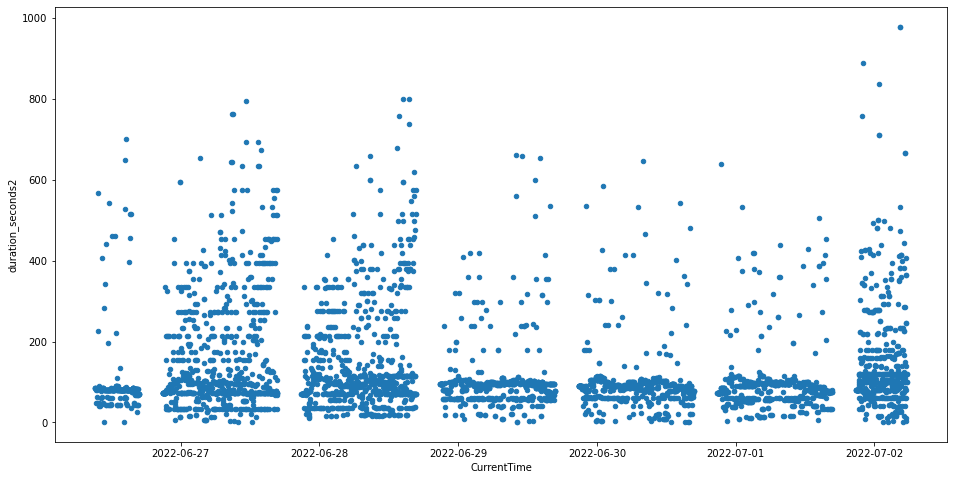

In [17]:
target_stop = df.loc[df['BusStopCode'] == 46271]

target_stop.plot.scatter(x='CurrentTime', y='duration_seconds2',figsize=(16,8))

## Scatter plot of Hour of the day against Travel Duration (seconds)

<AxesSubplot:xlabel='hour', ylabel='duration_seconds2'>

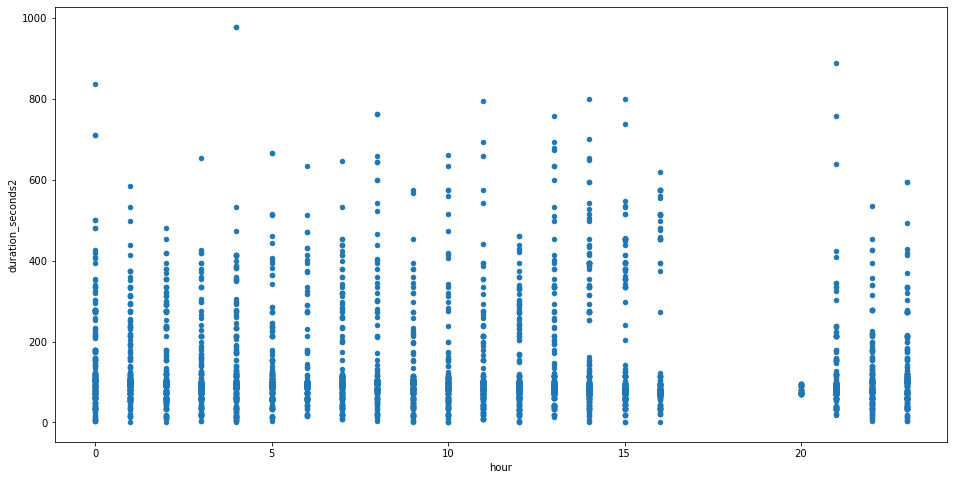

In [18]:
target_stop.plot.scatter(x='hour', y='duration_seconds2',figsize=(16,8))

## Scatter plot of Day of week (e.g. Mon, Tues, Wed) against Travel Duration (seconds)

<AxesSubplot:xlabel='day', ylabel='duration_seconds2'>

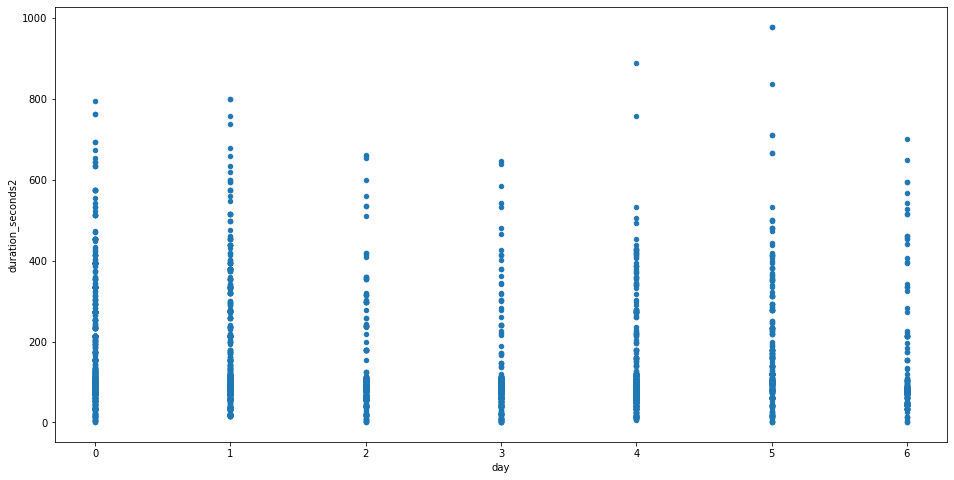

In [19]:
target_stop.plot.scatter(x='day', y='duration_seconds2',figsize=(16,8))

In [20]:
df['NextBus.Load'].unique()

array(['SEA', 'SDA', 'LSD'], dtype=object)

## Plot of Bus Load (Seating) vs Travel Duration

<AxesSubplot:>

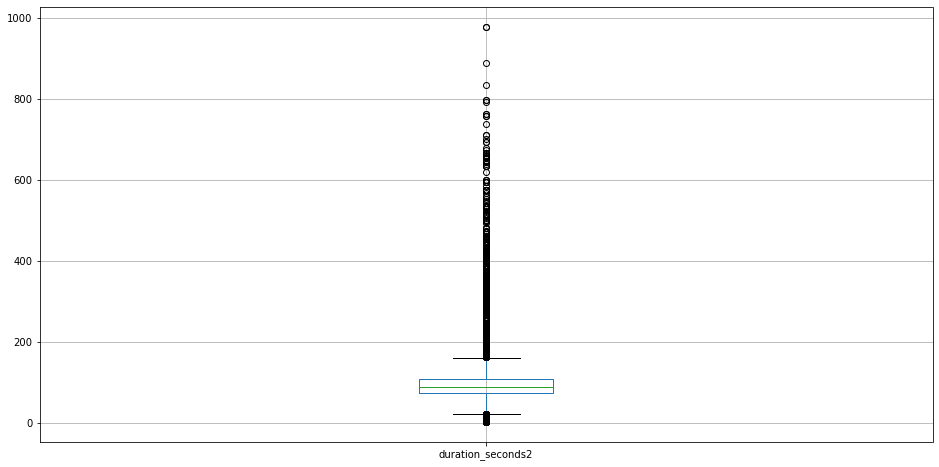

In [21]:
target_stop.loc[target_stop['NextBus.Load'] == 'SEA'].boxplot(column='duration_seconds2',figsize=(16,8))

## Plot of Bus Load (Standing) vs Travel Duration

<AxesSubplot:>

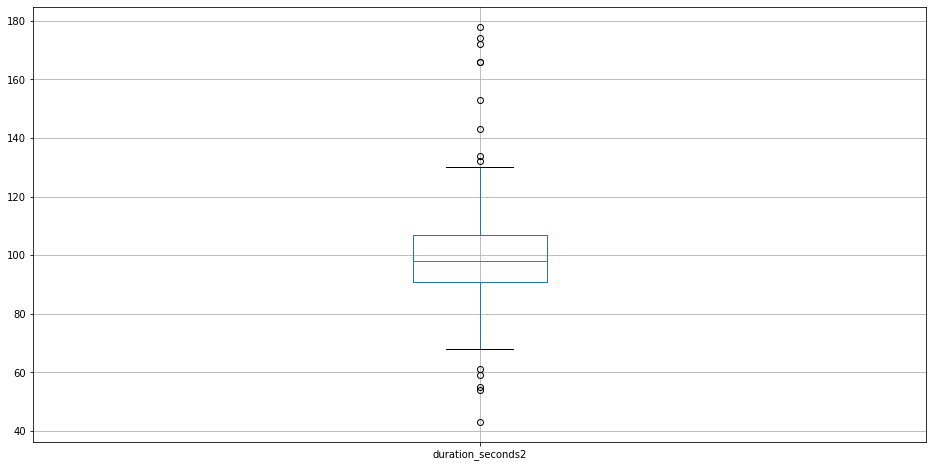

In [22]:
target_stop.loc[target_stop['NextBus.Load'] == 'SDA'].boxplot(column='duration_seconds2',figsize=(16,8))

In [23]:
df['NextBus.Type'].unique()

array(['DD', 'SD', 'BD'], dtype=object)

## Plot of Bus Type (Single-deck) vs Travel Duration

<AxesSubplot:>

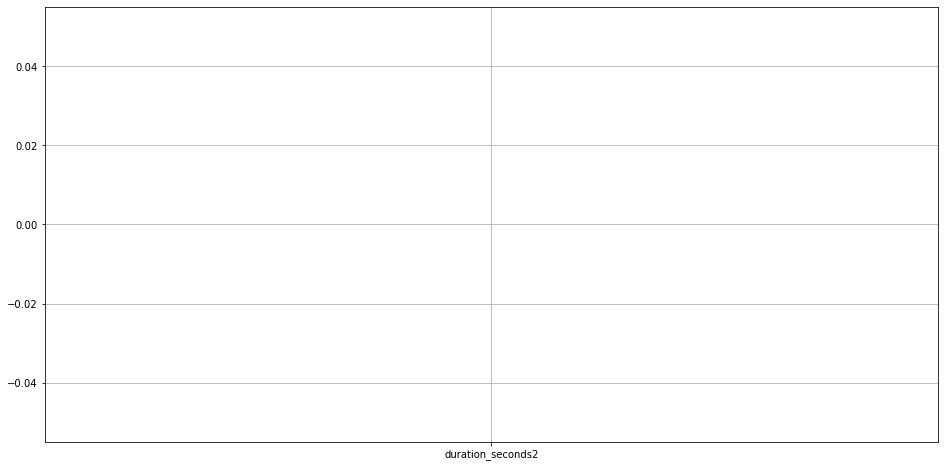

In [24]:
target_stop.loc[target_stop['NextBus.Load'] == 'SD'].boxplot(column='duration_seconds2',figsize=(16,8))

## Plot of Bus Type (Double-deck) vs Travel Duration

Does the type of bus affects the travel duration?

<AxesSubplot:>

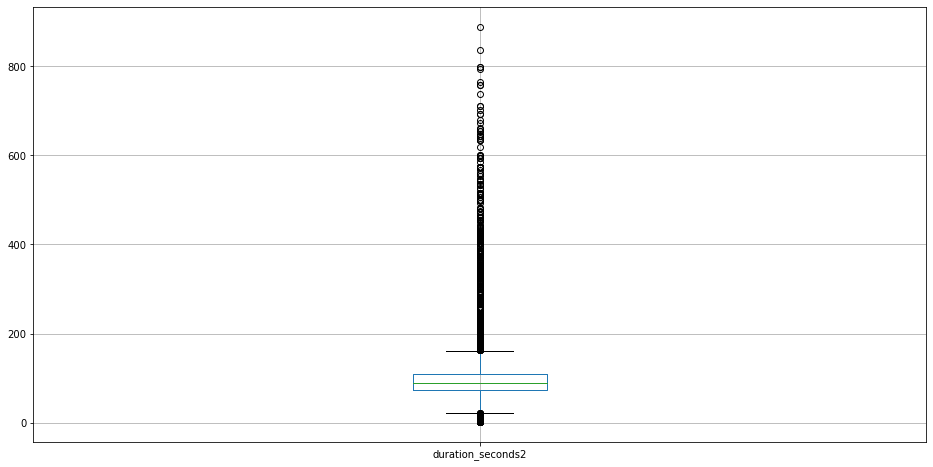

In [25]:
target_stop.loc[target_stop['NextBus.Type'] == 'DD'].boxplot(column='duration_seconds2',figsize=(16,8))

# Summary

## Findings
